<a href="https://colab.research.google.com/github/RofiqAulia/PCVK_Ganjil_2024/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TUGAS PRAKTIKUM

## **TUGAS PRAKTIKUM**
**1. Buka Google Colab, kemudian import folder yang ada di Drive Anda.**

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


**2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum minggu ke-6 berikut.**

In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

**3. Buatlah histogram citra seperti output histogram berikut berdasarkan flowchart di bawah ini : (Gunakan gambar lena.jpg).**

In [3]:
# Fungsi untuk menampilkan histogram
def show_image_histogram(img):
    # Konversi gambar BGR ke RGB
    img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

    # Pisahkan channel R, G, B
    r_channel, g_channel, b_channel = cv.split(img_rgb)

    # Hitung histogram untuk masing-masing channel (256 bin)
    r_hist = cv.calcHist([r_channel], [0], None, [256], [0, 256])
    g_hist = cv.calcHist([g_channel], [0], None, [256], [0, 256])
    b_hist = cv.calcHist([b_channel], [0], None, [256], [0, 256])

    # Plot hasil histogram
    plt.figure(figsize=(20, 5))

    plt.subplot(1, 3, 1)
    plt.bar(range(256), r_hist[:, 0], color='r', width=1)  # Menggunakan plt.bar
    plt.title('Red channel')
    plt.xlim([0, 256])
    plt.xlabel('Intensitas Warna')
    plt.ylabel('Jumlah Kemunculan')

    plt.subplot(1, 3, 2)
    plt.bar(range(256), g_hist[:, 0], color='g', width=1)  # Menggunakan plt.bar
    plt.title('Green channel')
    plt.xlim([0, 256])
    plt.xlabel('Intensitas Warna')
    plt.ylabel('Jumlah Kemunculan')

    plt.subplot(1, 3, 3)
    plt.bar(range(256), b_hist[:, 0], color='b', width=1)  # Menggunakan plt.bar
    plt.title('Blue channel')
    plt.xlim([0, 256])
    plt.xlabel('Intensitas Warna')
    plt.ylabel('Jumlah Kemunculan')

    plt.tight_layout()  # Mengatur layout agar lebih rapi
    plt.show()

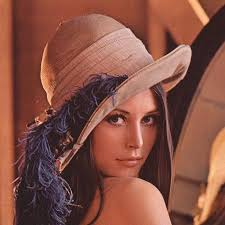

In [7]:
# Membaca gambar lena.jpeg
img_lena = cv.imread('/content/drive/MyDrive/PCVK/Images/lena.jpeg')
cv2_imshow(img_lena)


**4. Setelah mengerjakan soal no. 3, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh NumPy yaitu “histogram”. Bandingkan hasilnya. Apakah output muncul sama?**
> Iya, kedua metode menghasilkan histogram yang sama secara logis karena keduanya menghitung histogram dari gambar yang sama, meskipun menggunakan cara yang berbeda.

In [9]:
# Fungsi untuk menampilkan histogram menggunakan NumPy
def show_image_histogram_with_numpy(img):
    # Cek apakah gambar grayscale atau RGB
    if len(img.shape) == 2:  # Gambar grayscale
        # Hitung histogram untuk gambar grayscale
        hist, bins = np.histogram(img.flatten(), bins=256, range=[0, 256])

        # Plot histogram grayscale
        plt.figure(figsize=(6, 5))
        plt.bar(bins[:-1], hist, color='gray', width=1)  # Menggunakan plt.bar
        plt.title('Grayscale Histogram (NumPy)')
        plt.xlim([0, 256])
        plt.xlabel('Intensitas Warna')
        plt.ylabel('Jumlah Kemunculan')
        plt.tight_layout()
        plt.show()

    else:  # Gambar RGB
        # Konversi gambar BGR ke RGB
        img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

        # Pisahkan channel R, G, B
        r_channel, g_channel, b_channel = cv.split(img_rgb)

        # Hitung histogram menggunakan numpy
        r_hist_np, r_bins = np.histogram(r_channel.flatten(), bins=256, range=[0, 256])
        g_hist_np, g_bins = np.histogram(g_channel.flatten(), bins=256, range=[0, 256])
        b_hist_np, b_bins = np.histogram(b_channel.flatten(), bins=256, range=[0, 256])

        # Plot hasil histogram
        plt.figure(figsize=(18, 5))

        plt.subplot(1, 3, 1)
        plt.bar(r_bins[:-1], r_hist_np, color='r', width=1)  # Menggunakan plt.bar
        plt.title('Red channel (NumPy)')
        plt.xlim([0, 256])
        plt.xlabel('Intensitas Warna')
        plt.ylabel('Jumlah Kemunculan')

        plt.subplot(1, 3, 2)
        plt.bar(g_bins[:-1], g_hist_np, color='g', width=1)  # Menggunakan plt.bar
        plt.title('Green channel (NumPy)')
        plt.xlim([0, 256])
        plt.xlabel('Intensitas Warna')
        plt.ylabel('Jumlah Kemunculan')

        plt.subplot(1, 3, 3)
        plt.bar(b_bins[:-1], b_hist_np, color='b', width=1)  # Menggunakan plt.bar
        plt.title('Blue channel (NumPy)')
        plt.xlim([0, 256])
        plt.xlabel('Intensitas Warna')
        plt.ylabel('Jumlah Kemunculan')

        plt.tight_layout()  # Mengatur layout agar lebih rapi
        plt.show()

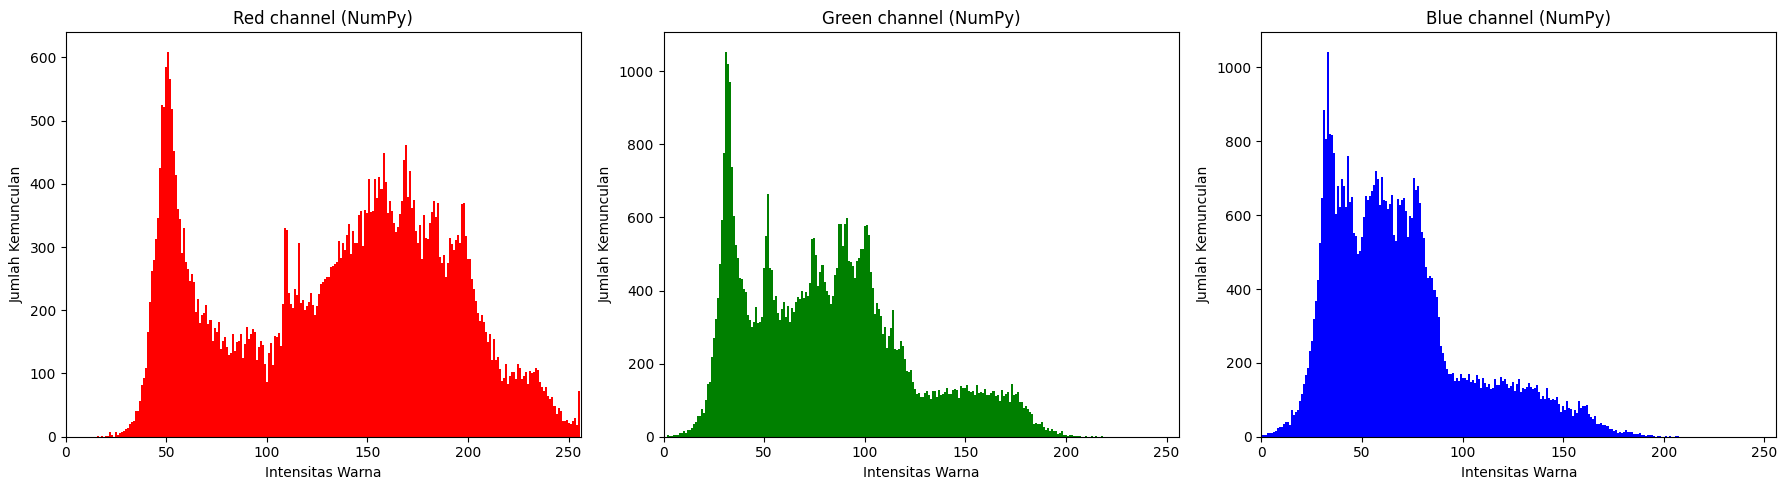

In [10]:
# Tampilkan histogram citra menggunakan NumPy
show_image_histogram_with_numpy(img_lena)

**5. Buatlah histogram citra seperti output histogram equalization dan juga tampilan gambar sebelum dan sesudah proses histogram equalization berikut berdasarkan flowchart di bawah ini : (Gunakan gambar lena_lc.jpg).**

In [18]:
img_lena_lc = cv.imread ('/content/drive/MyDrive/PCVK/Images/lenagray.png')

In [19]:
# Fungsi untuk menghitung histogram
def get_histogram(channel):
    histogram = np.zeros(256)
    for pixel in channel:
        histogram[pixel] += 1
    return histogram

In [20]:
# Hitung histogram untuk setiap channel
b_channel, g_channel, r_channel = cv.split(img_lena_lc)
r_hist = get_histogram(r_channel.flatten())
g_hist = get_histogram(g_channel.flatten())
b_hist = get_histogram(b_channel.flatten())

# Hitung histogram gabungan
histogram_array = np.bincount(img_lena_lc.flatten(), minlength=256)

# Normalisasi histogram
num_px = np.sum(histogram_array)
normalized_histogram = histogram_array / num_px

# Hitung CDF
cdf = np.cumsum(normalized_histogram)

# Buat transformasi
transform_map = np.floor(255 * cdf).astype(np.uint8)

# Terapkan transformasi ke gambar
img_list = list(img_lena_lc.flatten())
eq_img_list = [transform_map[p] for p in img_list]
eq_img_array = np.reshape(np.asarray(eq_img_list), img_lena_lc.shape)

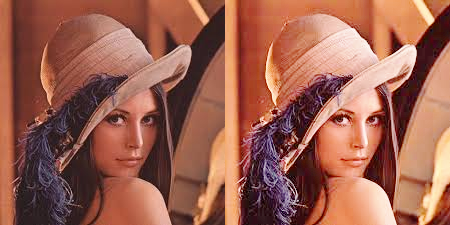

In [17]:
final_frame = cv.hconcat((img_lena_lc, eq_img_array))
cv2_imshow(final_frame)

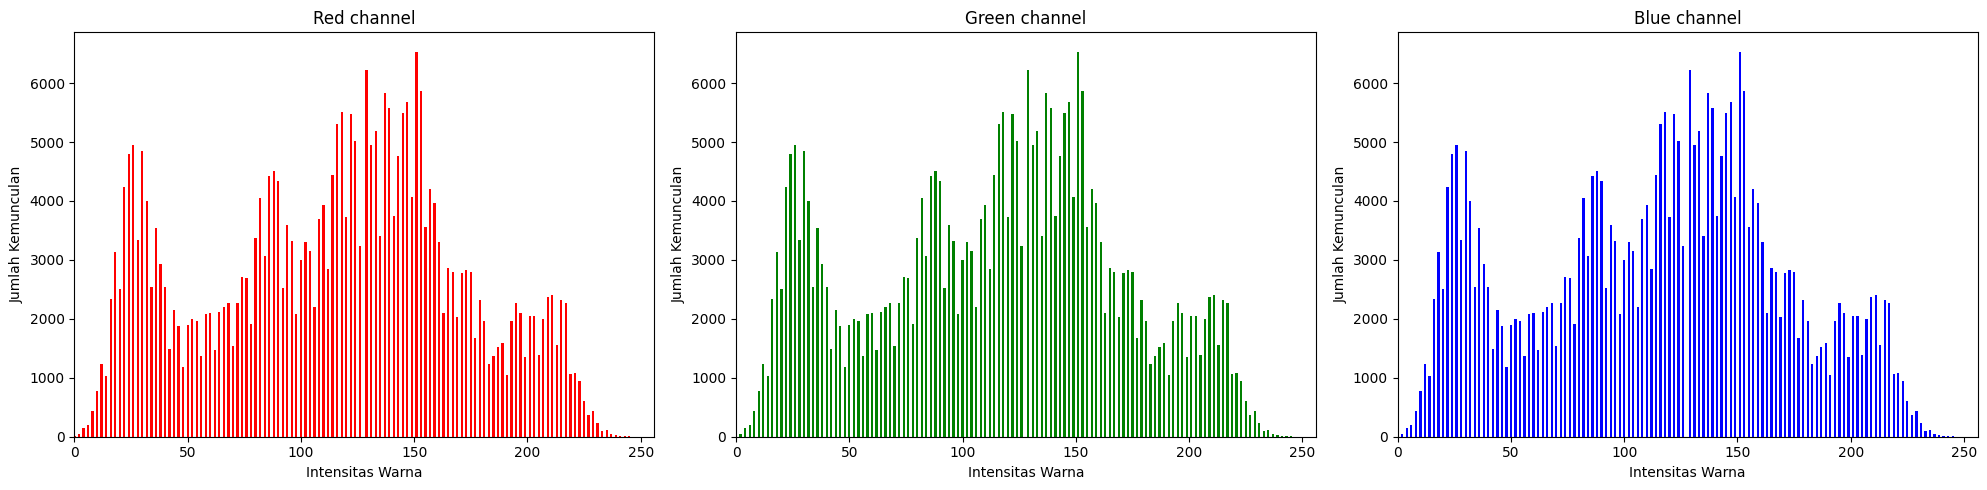

In [21]:
show_image_histogram(img_lena_lc)

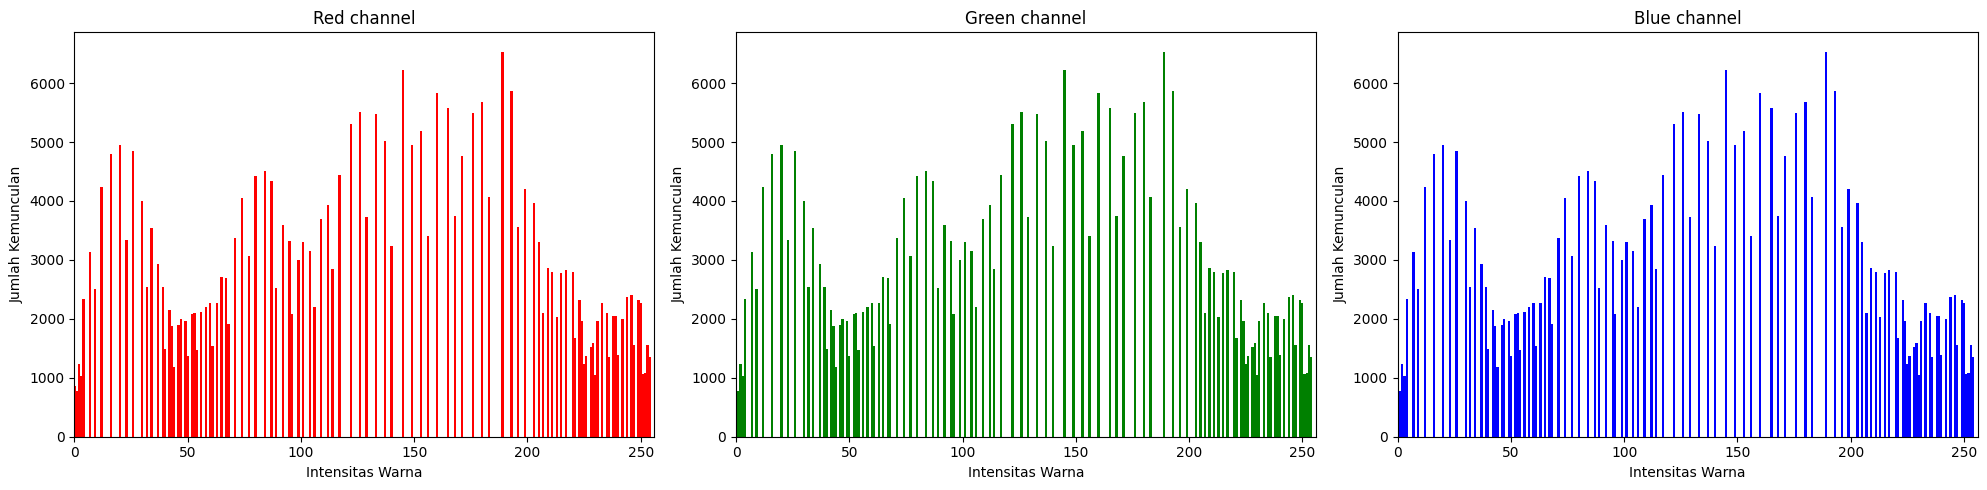

In [22]:
show_image_histogram(eq_img_array)

In [ ]:
**6. Setelah mengerjakan soal no. 5, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist”. Bandingkan hasilnya. Apakah output muncul sama?**
> Hasil yang diperoleh berbeda, di mana gambar yang dihasilkan menggunakan OpenCV (CV2) cenderung memiliki nuansa kebiru-biruan. Sementara itu, gambar yang dihasilkan melalui metode manual lebih mendekati tampilan gambar aslinya.

In [23]:
def histogram_equalization(img):
    # Konversi gambar dari BGR ke RGB
    img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

    # Pisahkan setiap channel warna
    r_channel, g_channel, b_channel = cv.split(img_rgb)

    # Lakukan histogram equalization pada setiap channel warna
    r_eq = cv.equalizeHist(r_channel)
    g_eq = cv.equalizeHist(g_channel)
    b_eq = cv.equalizeHist(b_channel)

    # Gabungkan kembali setiap channel warna yang sudah diequalisasi
    img_eq = cv.merge([r_eq, g_eq, b_eq])

    # Konversi citra hasil equalization dari RGB ke BGR
    img_eq_bgr = cv.cvtColor(img_eq, cv.COLOR_RGB2BGR)

    return img_eq_bgr

In [24]:
img2_histeqed = histogram_equalization(img_lena_lc)

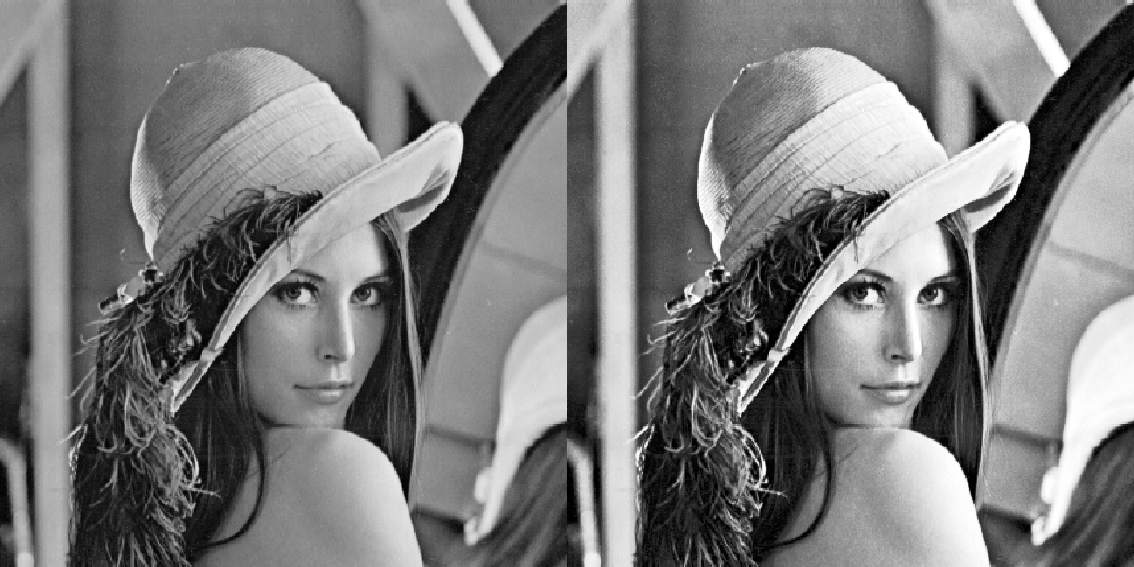

In [25]:
final_frame2 = cv.hconcat((img_lena_lc, img2_histeqed))
cv2_imshow(final_frame2)

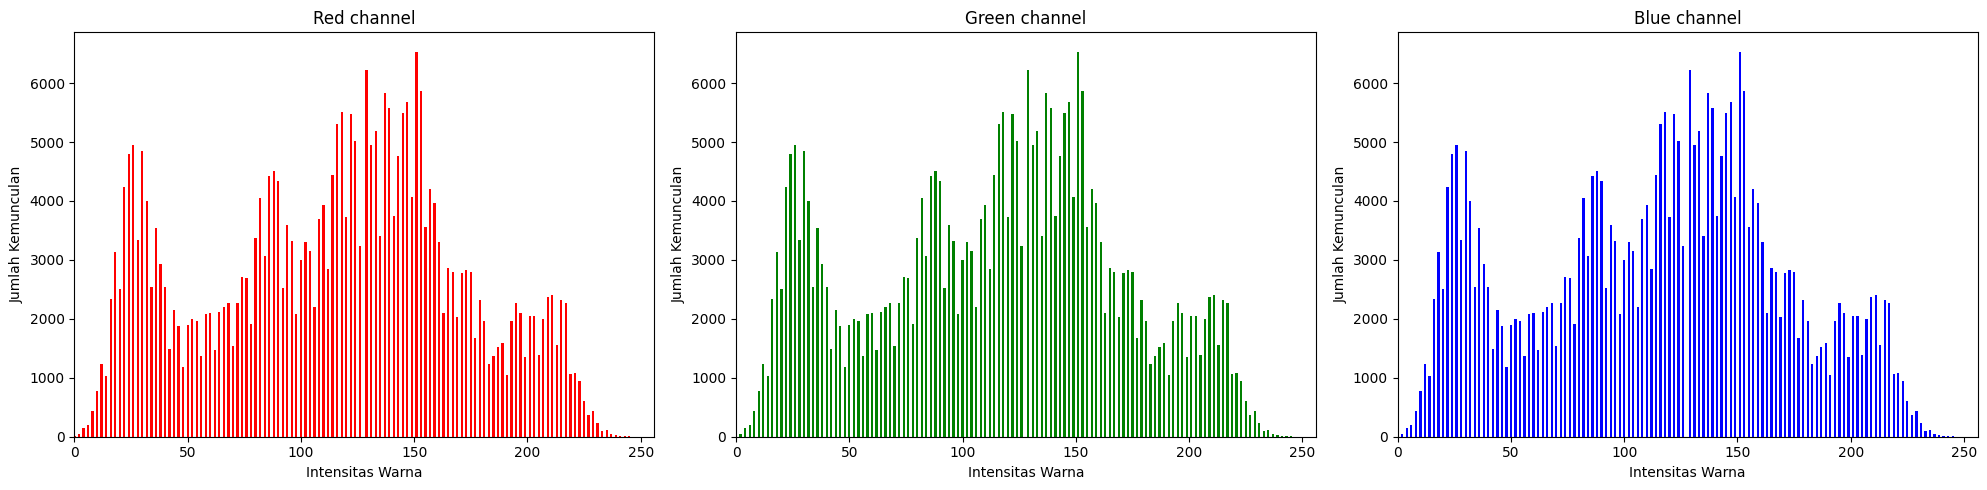

In [26]:
show_image_histogram(img_lena_lc)

In [ ]:
show_image_histogram(img2_histeqed)

**7. Lakukanlah proses pemetaan 16 juta warna RGB ke dalam 8 warna saja, yaitu hitam, hijau, kuning, biru, cyan, magenta, putih seperti output berikut berdasarkan flowchart di bawah ini! (Gunakan gambar lena.jpg)**

In [27]:
# Fungsi untuk menghitung jarak Euclidean antara dua warna
def color_distance(color1, color2):
    return np.sqrt(np.sum((color1 - color2) ** 2))

# Fungsi untuk memetakan warna ke dalam 8 warna yang ditentukan
def color_mapping(img):
    # Definisikan 8 warna target (hitam, hijau, kuning, biru, cyan, magenta, putih)
    colors = {
        "black": np.array([0, 0, 0]),
        "green": np.array([0, 255, 0]),
        "yellow": np.array([255, 255, 0]),
        "blue": np.array([0, 0, 255]),
        "cyan": np.array([0, 255, 255]),
        "magenta": np.array([255, 0, 255]),
        "white": np.array([255, 255, 255])
    }

    # Hasil gambar yang telah dipetakan
    mapped_image = np.zeros_like(img)

    # Iterasi melalui setiap piksel gambar
    height, width, _ = img.shape
    for y in range(height):
        for x in range(width):
            pixel_color = img[y, x]
            # Cari warna terdekat
            closest_color = None
            min_distance = float('inf')
            for color_name, color_value in colors.items():
                distance = color_distance(pixel_color, color_value)
                if distance < min_distance:
                    min_distance = distance
                    closest_color = color_value
            # Set warna terdekat pada gambar hasil
            mapped_image[y, x] = closest_color

    return mapped_image

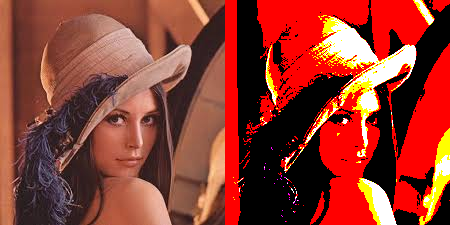

In [28]:
# Terapkan pemetaan warna
mapped_img = color_mapping(img_lena)

# Tampilkan gambar asli dan gambar yang telah dipetakan
final_frame = cv.hconcat((img_lena, mapped_img))

# Use cv2_imshow instead of cv.imshow
cv2_imshow(final_frame)

In [ ]:
**8. Lakukanlah proses dithering Floyd and Steinberg seperti output berikut (tampilan image awal, dan tampilan setelah dithering) berdasarkan flowchart di bagian bawah halaman modul ini! (Gunakan gambar lena.jpg)**

In [29]:
def dithering_floyd_steinberg(img):
    # Konversi gambar dari BGR ke RGB
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

    # Buat array kosong untuk citra hasil dithering
    img_dither = np.zeros_like(img)

    # Lakukan error diffusion Floyd pada setiap channel warna
    for y in range(img.shape[0]-1):
        for x in range(img.shape[1]-1):
            # Channel Red
            old_val_r = img[y,x,0]
            new_val_r = 255 if old_val_r > 127 else 0
            img_dither[y,x,0] = new_val_r
            error_r = old_val_r - new_val_r

            if x < img.shape[1]-1:
                img[y,x+1,0] += error_r * 7 / 16
            if x > 0 and y < img.shape[0]-1:
                img[y+1,x-1,0] += error_r * 3 / 16
            if y < img.shape[0]-1:
                img[y+1,x,0] += error_r * 5 / 16
            if x < img.shape[1]-1 and y < img.shape[0]-1:
                img[y+1,x+1,0] += error_r * 1 / 16

            # Channel Green
            old_val_g = img[y,x,1]
            new_val_g = 255 if old_val_g > 127 else 0
            img_dither[y,x,1] = new_val_g
            error_g = old_val_g - new_val_g

            if x < img.shape[1]-1:
                img[y,x+1,1] += error_g * 7 / 16
            if x > 0 and y < img.shape[0]-1:
                img[y+1,x-1,1] += error_g * 3 / 16
            if y < img.shape[0]-1:
                img[y+1,x,1] += error_g * 5 / 16
            if x < img.shape[1]-1 and y < img.shape[0]-1:
                img[y+1,x+1,1] += error_g * 1 / 16

            # Channel Blue
            old_val_b = img[y,x,2]
            new_val_b = 255 if old_val_b > 127 else 0
            img_dither[y,x,2] = new_val_b
            error_b = old_val_b - new_val_b

            if x < img.shape[1]-1:
                img[y,x+1,2] += error_b * 7 / 16
            if x > 0 and y < img.shape[0]-1:
                img[y+1,x-1,2] += error_b * 3 / 16
            if y < img.shape[0]-1:
                img[y+1,x,2] += error_b * 5 / 16
            if x < img.shape[1]-1 and y < img.shape[0]-1:
                img[y+1,x+1,2] += error_b * 1 / 16

    # Kembalikan citra hasil dithering ke BGR
    img_dither = cv.cvtColor(img_dither, cv.COLOR_RGB2BGR)

    return img_dither

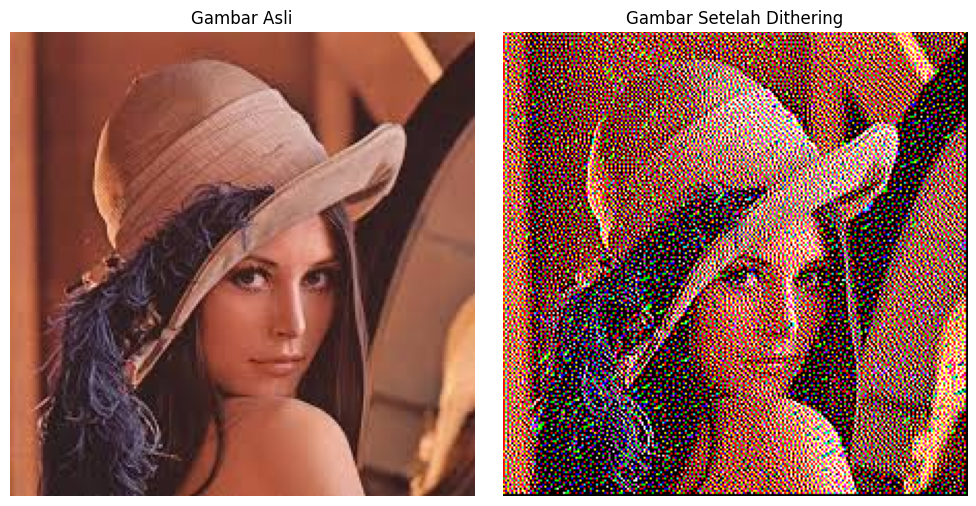

In [30]:
# Terapkan dithering
img_lena_dithered = dithering_floyd_steinberg(img_lena)

# Tampilkan gambar asli dan gambar setelah dithering menggunakan matplotlib
plt.figure(figsize=(10, 5))

# Gambar asli
plt.subplot(1, 2, 1)
plt.title('Gambar Asli')
plt.imshow(cv.cvtColor(img_lena, cv.COLOR_BGR2RGB))  # Menggunakan img1
plt.axis('off')  # Matikan sumbu

# Gambar setelah dithering
plt.subplot(1, 2, 2)
plt.title('Gambar Setelah Dithering')
plt.imshow(cv.cvtColor(img_lena_dithered, cv.COLOR_BGR2RGB))  # Menggunakan img1_dithered
plt.axis('off')  # Matikan sumbu

plt.tight_layout()
plt.show()

**9. Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil histogram equalization implementasikan proses dithering Floyd and Steinberg sehingga menampilkan gambar di bawah ini!**

In [31]:
img_lena_lc_gray = cv.cvtColor(img_lena_lc, cv.COLOR_BGR2GRAY)
img_lena_lc_gray = cv.cvtColor(img_lena_lc_gray, cv.COLOR_GRAY2BGR)

In [32]:
img_lena_lc_gray_histeqed = histogram_equalization(img_lena_lc_gray)

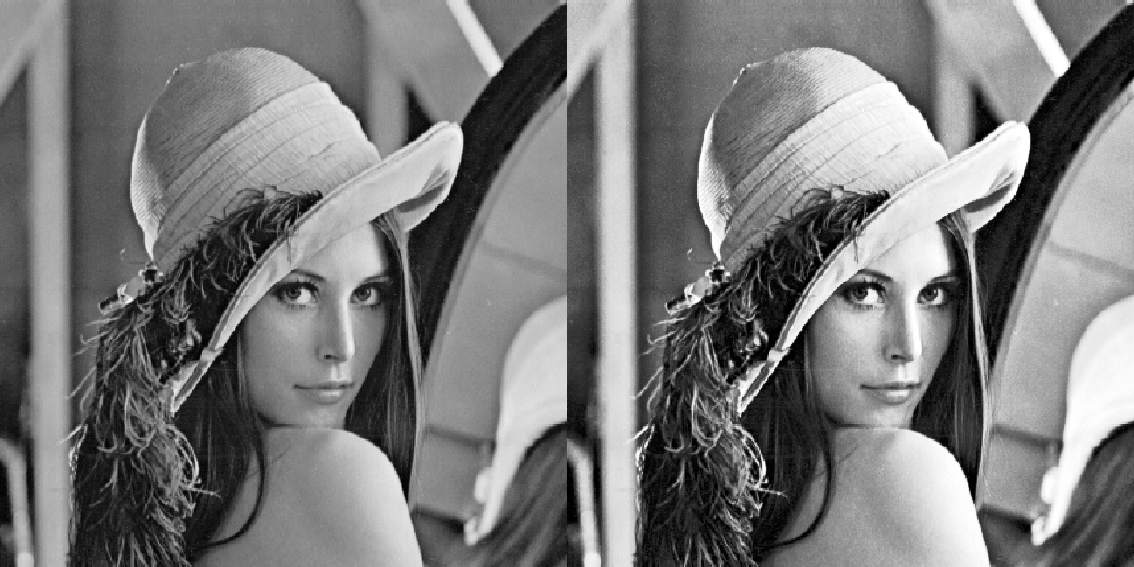

In [33]:
final_frame5 = cv.hconcat((img_lena_lc_gray, img_lena_lc_gray_histeqed))
cv2_imshow(final_frame5)

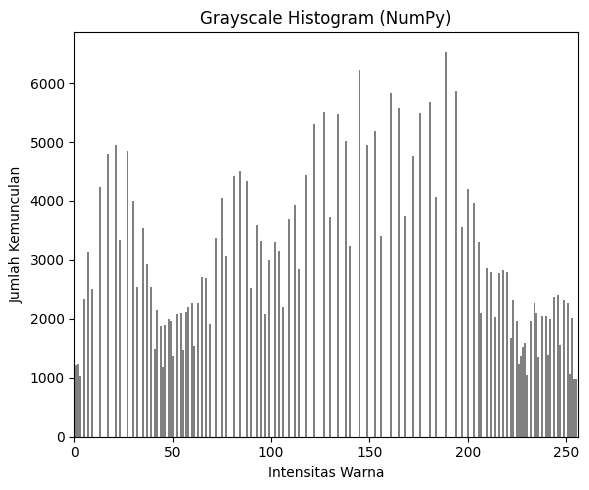

In [34]:
# Terapkan histogram equalization di sini jika belum diterapkan
img_lena_lc_gray = cv.cvtColor(img_lena_lc_gray, cv.COLOR_BGR2GRAY) # convert image to grayscale
img_lena_lc_gray_histeqed = cv.equalizeHist(img_lena_lc_gray)

# Panggil fungsi untuk menampilkan histogram
show_image_histogram_with_numpy(img_lena_lc_gray_histeqed)

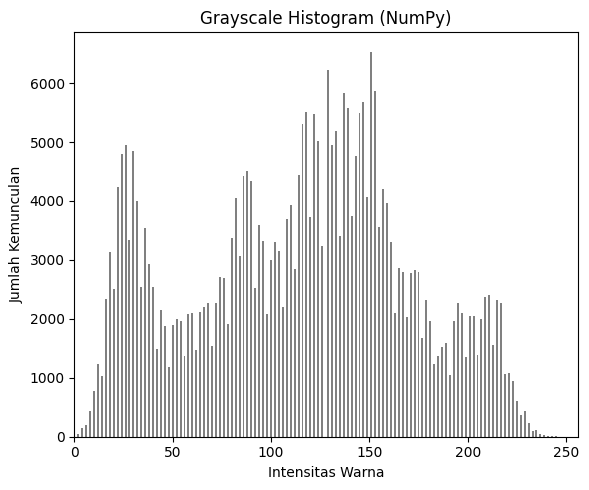

In [35]:
show_image_histogram_with_numpy(img_lena_lc_gray)

In [39]:
img_lena_lc_gray_histeqed_dithered = dithering_floyd_steinberg(img_lena_lc_gray_histeqed)

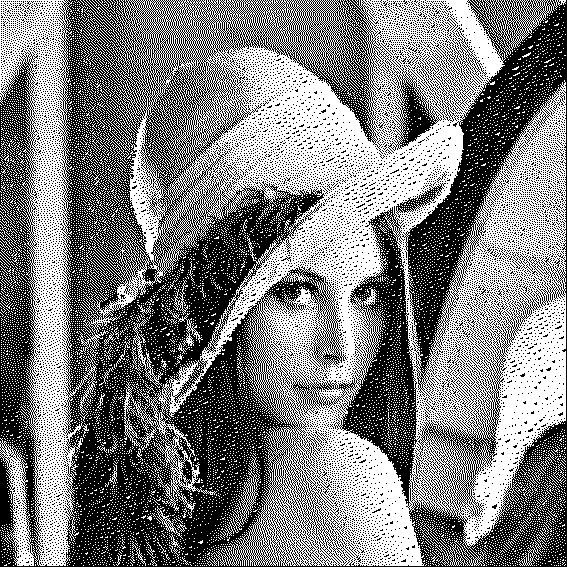

In [41]:
cv2_imshow(img_lena_lc_gray_histeqed_dithered)